## Title of the project:

Servo prediction using LinearRegression

## Objective:
**Servo**: In control engineering a servomachanisam,uasually shortened to servo.It is an automatic device that uses error sensing negative feedback to coorect the action of a machanisam.

## Data Source
From YBI Foundation GitHub we take this dataset.

## Import Library

In [1]:
import pandas as pd

In [2]:
import numpy as np

## Import Data

In [3]:
df = pd.read_csv(r'https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Servo%20Mechanism.csv')

## Describe Data

In [4]:
df.head

<bound method NDFrame.head of     Motor Screw  Pgain  Vgain  Class
0       E     E      5      4      4
1       B     D      6      5     11
2       D     D      4      3      6
3       B     A      3      2     48
4       D     B      6      5      6
..    ...   ...    ...    ...    ...
162     B     C      3      2     44
163     B     E      3      1     40
164     C     D      4      3     25
165     A     B      3      2     44
166     A     A      6      5     20

[167 rows x 5 columns]>

In [5]:
df.info

<bound method DataFrame.info of     Motor Screw  Pgain  Vgain  Class
0       E     E      5      4      4
1       B     D      6      5     11
2       D     D      4      3      6
3       B     A      3      2     48
4       D     B      6      5      6
..    ...   ...    ...    ...    ...
162     B     C      3      2     44
163     B     E      3      1     40
164     C     D      4      3     25
165     A     B      3      2     44
166     A     A      6      5     20

[167 rows x 5 columns]>

In [6]:
df.describe

<bound method NDFrame.describe of     Motor Screw  Pgain  Vgain  Class
0       E     E      5      4      4
1       B     D      6      5     11
2       D     D      4      3      6
3       B     A      3      2     48
4       D     B      6      5      6
..    ...   ...    ...    ...    ...
162     B     C      3      2     44
163     B     E      3      1     40
164     C     D      4      3     25
165     A     B      3      2     44
166     A     A      6      5     20

[167 rows x 5 columns]>

In [7]:
df.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

In [8]:
df.shape

(167, 5)

## Data Preprocessing

In [9]:
df[['Motor']].value_counts()

Motor
C        40
A        36
B        36
E        33
D        22
Name: count, dtype: int64

In [10]:
df[['Screw']].value_counts()

Screw
A        42
B        35
C        31
D        30
E        29
Name: count, dtype: int64

In [11]:
df.replace({'Motor':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

In [12]:
df.replace({'Screw':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

## Define Target Variable (y) and Feature Variables (X)

In [15]:
y = df['Class']

In [16]:
y.shape

(167,)

In [17]:
y

0       4
1      11
2       6
3      48
4       6
       ..
162    44
163    40
164    25
165    44
166    20
Name: Class, Length: 167, dtype: int64

In [18]:
X= df.drop('Class',axis=1)

In [19]:
X.shape

(167, 4)

In [20]:
X

,Motor,Screw,Pgain,Vgain
0,4,4,5,4
1,1,3,6,5
2,3,3,4,3
3,1,0,3,2
4,3,1,6,5
...,...,...,...,...
162,1,2,3,2
163,1,4,3,1
164,2,3,4,3
165,0,1,3,2


## Train Test Split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2529)

In [23]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((116, 4), (51, 4), (116,), (51,))

## Get a Model

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lr=LinearRegression()

In [26]:
lr.fit(X_train, y_train)

LinearRegression()

## Model Evaluation

In [27]:
y_pred= lr.predict(X_test)

In [28]:
y_pred.shape

(51,)

In [29]:
y_pred

array([24.55945258, 30.98765106, 18.54485477, 25.51524243, 38.56082023,
       23.52007775, 11.61947065, 20.03335614, 40.60404401, 41.7009556 ,
       13.66269443, 26.01242807, 16.50163099, 16.54663453, 21.92598051,
       22.52570646, -5.46449561, 30.68912392, 32.7323477 ,  1.41282941,
       33.97718702, 31.63543611, 33.52806048, 30.04133887, 19.38557109,
        6.49364826, 28.5528375 , 17.04382017, 25.06611589,  3.50411229,
       30.59606128, 23.67067716, 35.72188367, 32.08456265, 12.46018697,
        3.6547117 , 23.47201865, 33.03087484, 17.49294672, 37.61450804,
       27.54898855, 22.07657992, 11.51387478,  9.470651  , 30.53852451,
       28.64590014, 33.67865989,  4.60102388, 24.1198037 , 21.13026773,
       25.71390094])

In [30]:
from sklearn.metrics import mean_squared_error

In [31]:
mean_squared_error(y_test,y_pred)


66.03589175595563

## Data Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

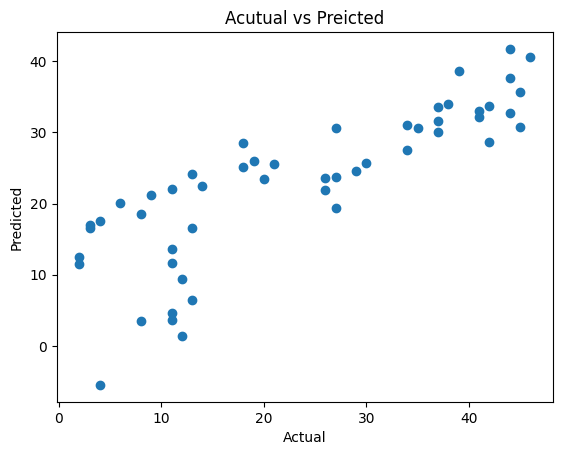

In [32]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Acutual vs Preicted")
plt.show


## Get a Model Prediction

In [33]:
X_new= df.sample(1)

In [34]:
X_new

,Motor,Screw,Pgain,Vgain,Class
142,0,4,3,1,41


In [35]:
X_new.shape

(1, 5)

In [36]:
X_new= X_new.drop('Class',axis=1)

In [37]:
X_new

,Motor,Screw,Pgain,Vgain
142,0,4,3,1


In [38]:
X_new.shape

(1, 4)

In [39]:
y_pred_new=lr.predict(X_new)

In [40]:
y_pred_new

array([28.1487145])

## Explaination
 Linear regression was implemented for servo prediction.It is very easy to implement on any dataset.